In [1]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt
import seaborn as sns         
import warnings 
warnings.filterwarnings('ignore')

In [2]:
credit_df=pd.read_csv('creditcard_approval.csv',header=None)
credit_df.columns=['Gender','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employee','CreditScore','DriversLicense','Citizen','ZipCode','Income','ApprovalStatus']

In [3]:
credit_df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employee,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [4]:
credit_df.shape

(690, 16)

In [5]:
credit_df.iloc[0:5,1:7]  #index based in the form of an integer

,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity
0,30.83,0.000,u,g,w,v
1,58.67,4.460,u,g,q,h
2,24.5,0.500,u,g,q,h
3,27.83,1.540,u,g,w,v
4,20.17,5.625,u,g,w,v


In [6]:
credit_df.loc[3,"Married"]     # df.loc[rows,column],label based

'u'

In [7]:
credit_df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employee          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [8]:
credit_df.ApprovalStatus.value_counts()

-    383
+    307
Name: ApprovalStatus, dtype: int64

In [9]:
credit_df.drop(["DriversLicense","ZipCode"],axis=1,inplace=True)

array([[<AxesSubplot:title={'center':'Debt'}>,
        <AxesSubplot:title={'center':'YearsEmployed'}>],
       [<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Income'}>]], dtype=object)

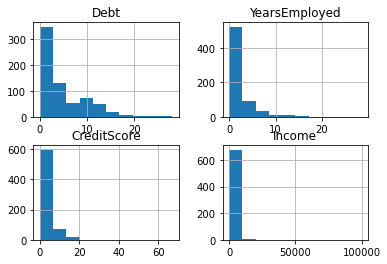

In [10]:
credit_df.hist()

In [11]:
credit_df.shape

(690, 14)

In [12]:
# Replace the '?'s with NaN
credit_df = credit_df.replace('?', np.nan)
#Replacing the '+' with "Approved" & '-' with "Rejected" and "a" with "F" and "b" with "M"
credit_df = credit_df.replace('+',"Approved")
credit_df = credit_df.replace('-',"Rejected")
credit_df = credit_df.replace('a',"F")
credit_df = credit_df.replace('b',"M")

# Inspect the missing values again
credit_df.tail(17)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employee,CreditScore,Citizen,Income,ApprovalStatus
673,NaN,29.5,2.000,y,p,e,h,2.000,f,f,0,g,17,Rejected
674,F,37.33,2.500,u,g,i,h,0.210,f,f,0,g,246,Rejected
675,F,41.58,1.040,u,g,aa,v,0.665,f,f,0,g,237,Rejected
676,F,30.58,10.665,u,g,q,h,0.085,f,t,12,g,3,Rejected
677,M,19.42,7.250,u,g,m,v,0.040,f,t,1,g,1,Rejected
678,F,17.92,10.210,u,g,ff,ff,0.000,f,f,0,g,50,Rejected
679,F,20.08,1.250,u,g,c,v,0.000,f,f,0,g,0,Rejected
680,M,19.5,0.290,u,g,k,v,0.290,f,f,0,g,364,Rejected
681,M,27.83,1.000,y,p,d,h,3.000,f,f,0,g,537,Rejected
682,M,17.08,3.290,u,g,i,v,0.335,f,f,0,g,2,Rejected


In [13]:
# Impute the missing values with mean imputation
credit_df.fillna(credit_df.mean(), inplace=True)

# Count the number of NaNs in the dataset to verify
credit_df.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employee           0
CreditScore        0
Citizen            0
Income             0
ApprovalStatus     0
dtype: int64

In [14]:
for col in credit_df.columns:
    # Check if the column is of object type
    if credit_df[col].dtypes == 'object':
        # Impute with the most frequent value
        credit_df = credit_df.fillna(credit_df[col].value_counts().index[0])

In [15]:
credit_df.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employee           object
CreditScore         int64
Citizen            object
Income              int64
ApprovalStatus     object
dtype: object

In [16]:
X_features=list(credit_df.columns)
X_features.remove('ApprovalStatus')
X_features

['Gender',
 'Age',
 'Debt',
 'Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'YearsEmployed',
 'PriorDefault',
 'Employee',
 'CreditScore',
 'Citizen',
 'Income']

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [18]:
cat_cols = ['Gender',
 'Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'PriorDefault',
 'Employee',
 'Citizen']

In [19]:
credit_df[cat_cols] = credit_df[cat_cols].apply(LabelEncoder().fit_transform)
credit_df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employee,CreditScore,Citizen,Income,ApprovalStatus
0,1,30.83,0.000,2,1,13,8,1.25,1,1,1,0,0,Approved
1,0,58.67,4.460,2,1,11,4,3.04,1,1,6,0,560,Approved
2,0,24.5,0.500,2,1,11,4,1.50,1,0,0,0,824,Approved
3,1,27.83,1.540,2,1,13,8,3.75,1,1,5,0,3,Approved
4,1,20.17,5.625,2,1,13,8,1.71,1,0,0,2,0,Approved


In [20]:
credit_df = credit_df[pd.to_numeric(credit_df['Age'], errors='coerce').notnull()]

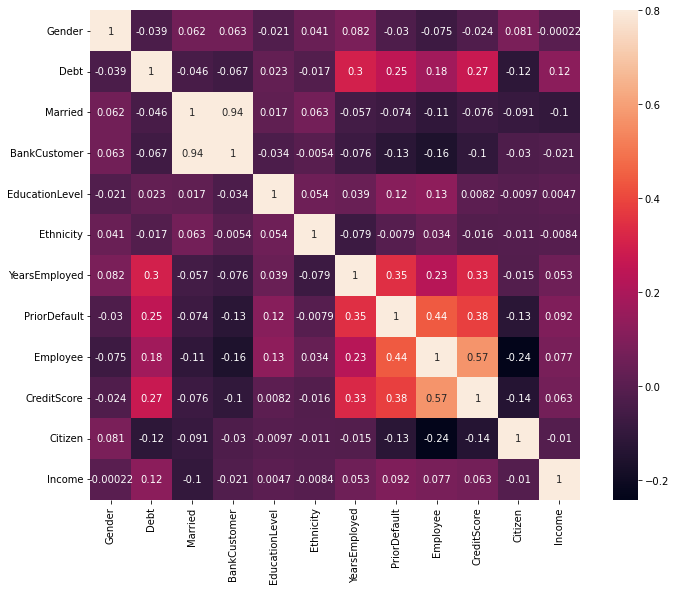

In [21]:
#correlation matrix
corrmat = credit_df.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,annot = True, vmax=.8, square=True);
plt.show()

In [22]:
import statsmodels.api as sm 

In [23]:
X=sm.add_constant(credit_df)
Y = [1 if x == 'Approved'   else 0 for x in credit_df.ApprovalStatus] 
X.drop(['ApprovalStatus'],axis=1,inplace=True)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X.astype('float'), Y,test_size=0.3, random_state=42)

In [25]:
logit = sm.Logit(Y_train, X_train.astype('float')).fit()

Optimization terminated successfully.
         Current function value: 0.297541
         Iterations 8


In [27]:
logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.568     
Dependent Variable: y                AIC:              310.0689  
Date:               2023-01-23 20:50 BIC:              368.3258  
No. Observations:   474              Log-Likelihood:   -141.03   
Df Model:           13               LL-Null:          -326.51   
Df Residuals:       460              LLR p-value:      3.0184e-71
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const              0.0893   1.0232  0.0873 0.9304 -1.9161  2.0948
Gender            -0.0869   0.3423 -0.2537 0.7997 -0.7578  0.5841
Age                0.0074   0.0137  0.5385 0.5902 -0.0194  0.0341
Debt              -0.0180   0.0331 -0.5417 0.5880 -0.0829  0.0470
Married           -2.6640   0.7066 -3.7701 0.0002 -4.0490 -1.2791
BankCustomer       0.9829   0.4319  2.2756 0.0229  0.1363  1.8295
EducationLevel     0.0493   0.0366  1.3475 0.1778 -0.0224  0.1211
Ethnicity          0.0522   0.0654  0.7985 0.4246 -0.0759  0.1804
YearsEmployed      0.0691   0.0608  1.1361 0.2559 -0.0501  0.1882
PriorDefault       4.0078   0.3984 10.0600 0.0000  3.2270  4.7886
Employee           0.4630   0.4395  1.0533 0.2922 -0.3985  1.3244
CreditScore        0.1258   0.0674  1.8683 0.0617 -0.0062  0.2579
Citizen            0.5361   0.3051  1.7570 0.0789 -0.0619  1.1342
Income             0.0006   0.0002  2.8316 0.0046  0.0002  0.0009
=================================================================

"""

In [28]:
#Picking up the list of significant features (p-value < 0.05)
#The model summary suggest that as per wald's test, only 8 features are statistically significnat
# as p values are less than 0.o05
#Defining function to perform the task.
def get_significant_vars(lm):
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars'] =  var_p_vals_df.index
    var_p_vals_df.columns= ['pvals','vars']
    return list (var_p_vals_df[var_p_vals_df.pvals<=0.05]['vars'])   

In [29]:
#Invoking the function to get the significant features from the model
significant_vars = get_significant_vars(logit)
significant_vars

['Married', 'BankCustomer', 'PriorDefault', 'Income']

In [30]:
#Rebuilding the logistic regression  model using only the significant variables
import statsmodels.api as sm
final_logit = sm.Logit(Y_train,sm.add_constant(X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.322727
         Iterations 8


In [31]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.531     
Dependent Variable: y                AIC:              315.9451  
Date:               2023-01-23 20:50 BIC:              336.7512  
No. Observations:   474              Log-Likelihood:   -152.97   
Df Model:           4                LL-Null:          -326.51   
Df Residuals:       469              LLR p-value:      7.5335e-74
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const          1.0551    0.8483   1.2438  0.2136  -0.6075   2.7177
Married       -2.4438    0.6185  -3.9509  0.0001  -3.6561  -1.2315
BankCustomer   0.7936    0.3803   2.0866  0.0369   0.0482   1.5391
PriorDefault   4.3683    0.3705  11.7893  0.0000   3.6421   5.0945
Income         0.0006    0.0002   3.5026  0.0005   0.0003   0.0010
=================================================================

"""

In [32]:
y_pred_df = pd.DataFrame({"actual": Y_test,
                         "predicted_prob": final_logit.predict(
                         sm.add_constant(X_test[significant_vars]))})

In [33]:
y_pred_df.sample(10, random_state =42)

,actual,predicted_prob
646,0,0.056213
389,0,0.045703
460,0,0.019931
282,0,0.045703
536,0,0.790753
486,0,0.069742
82,0,0.790753
235,1,0.947077
181,1,0.790753
552,1,0.804195


In [34]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x > 0.5 else 0)
y_pred_df.sample(10, random_state=42)

,actual,predicted_prob,predicted
646,0,0.056213,0
389,0,0.045703,0
460,0,0.019931,0
282,0,0.045703,0
536,0,0.790753,1
486,0,0.069742,0
82,0,0.790753,1
235,1,0.947077,1
181,1,0.790753,1
552,1,0.804195,1


In [31]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [32]:
def draw_cm(actual,predicted):
    cm=metrics.confusion_matrix(actual,predicted,[1,0])
    sn.heatmap(cm,annot=True,fmt='d',linewidth=.5,
              xticklabels=["Rejected","Approved"],
              yticklabels=["Rejected","Approved"])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

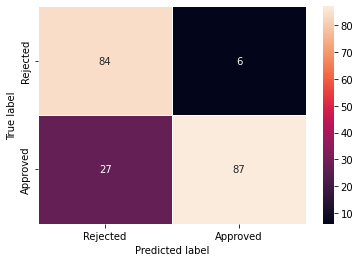

In [33]:
draw_cm(y_pred_df.actual,y_pred_df.predicted)

In [34]:
print(metrics.classification_report(y_pred_df.actual, y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       114
           1       0.76      0.93      0.84        90

    accuracy                           0.84       204
   macro avg       0.85      0.85      0.84       204
weighted avg       0.86      0.84      0.84       204



In [35]:
fpr,tpr,thresholds = metrics.roc_curve(y_pred_df.actual,y_pred_df.predicted_prob)
#Area under the curve (AUC)
auc_score=metrics.roc_auc_score(y_pred_df.actual,y_pred_df.predicted_prob)
print(auc_score)

0.8999512670565303


In [36]:
tpr_fpr=pd.DataFrame({'tpr':tpr,'fpr':fpr,'thresholds':thresholds})
tpr_fpr['diff']= tpr_fpr.tpr-tpr_fpr.fpr
tpr_fpr.sort_values('diff',ascending=False)[0:5]

,tpr,fpr,thresholds,diff
24,0.933333,0.236842,0.616079,0.696491
21,0.888889,0.201754,0.639590,0.687135
19,0.877778,0.192982,0.659108,0.684795
23,0.900000,0.219298,0.618280,0.680702
20,0.877778,0.201754,0.646435,0.676023


In [37]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x > 0.221 else 0)
y_pred_df.sample(10, random_state=42)

,actual,predicted_prob,predicted,predicted_new
646,0,0.056213,0,0
389,0,0.045703,0,0
460,0,0.019931,0,0
282,0,0.045703,0,0
536,0,0.790753,1,1
486,0,0.069742,0,0
82,0,0.790753,1,1
235,1,0.947077,1,1
181,1,0.790753,1,1
552,1,0.804195,1,1


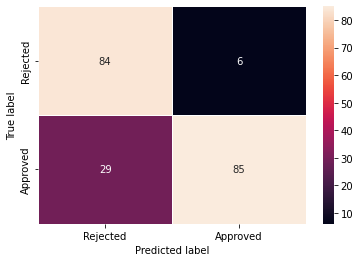

In [38]:
draw_cm(y_pred_df.actual,y_pred_df.predicted_new)

In [47]:
print(metrics.classification_report(y_pred_df.actual,y_pred_df.predicted_new))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83       114
           1       0.74      0.93      0.83        90

    accuracy                           0.83       204
   macro avg       0.84      0.84      0.83       204
weighted avg       0.85      0.83      0.83       204

